<a href="https://colab.research.google.com/github/yusrianasghany/Phishing-Web-Detection/blob/main/Data_Science_Project_Phishing_Web_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Requirements

Import library yang akan digunakan dan setting terhadap tampilan dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_colwidth', 100)
pd.set_option('max_rows', 100)

Load dataset ke file colab sebagai dataframe. Data sebelumnya sebelumnya telah di-upload ke 'Files' di google colab.

In [ ]:
df = pd.read_csv("dataset_phishing.csv")
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispa...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorsports-park/,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


Menampilkan tipe data dari setiap fitur yang ada di dataset. Hal ini berguna untuk melakukan seleksi fitur ke depannya.

In [ ]:
print(df.dtypes)
print(df.shape)

url                            object
length_url                      int64
length_hostname                 int64
ip                              int64
nb_dots                         int64
nb_hyphens                      int64
nb_at                           int64
nb_qm                           int64
nb_and                          int64
nb_or                           int64
nb_eq                           int64
nb_underscore                   int64
nb_tilde                        int64
nb_percent                      int64
nb_slash                        int64
nb_star                         int64
nb_colon                        int64
nb_comma                        int64
nb_semicolumn                   int64
nb_dollar                       int64
nb_space                        int64
nb_www                          int64
nb_com                          int64
nb_dslash                       int64
http_in_path                    int64
https_token                     int64
ratio_digits

Dilakukan penghapusan label kelas, yaitu kolom 'status'. Selain itu dilakukan juga penghapusan terhadap fitur yang bukan numerik, yaitu 'url'. Fitur 'url' dapat dihapus karena fitur-fitur lainnya yang terdapat pada dataset ini sudah cukup merepresentasikan 'url'. Fitur-fitur lain tersebut seperti 'length_url' dan 'length_hostname'.

In [ ]:
y = df['status']

#hapus label
X = df.drop(['status'], axis = 1)
#hapus fitur bukan numerik
X = X.drop(['url'], axis = 1)

Pemisahan fitur awal terhadap data training dan data testing. Data training dan data testing ini memiliki 87 fitur. Pemisahan awal ini tidak digunakan untuk modelling, melainkan preproscessing berupa penghapusan fitur.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3)

print(X_train.shape)

(8001, 87)


#Exploratory Data Analysis

Exploratory Data Analysis adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi. EDA membantu dalam mendeteksi kesalahan dari awal, dapat mengidentifikasi outlier, mengetahui hubungan antar data serta dapat menggali faktor-faktor penting dari data. Proses EDA sangat bermanfaat dalam proses analisis statistik.

Mengatur ukuran plot yang dihasilkan.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 30)

Boxplots dapat membantu dalam memahami karakteristik dari distribusi data. Selain untuk melihat derajat penyebaran data (yang dapat dilihat dari tinggi/panjang boxplot) juga dapat digunakan untuk menilai kesimetrisan sebaran data.

Dari boxplot yang dihasilkan pada kode dibawah, dapat dilihat bahwa ada banyak fitur yang memiliki outlier. Dilihat dari jumlahnya, dapat dikatakan bahwa banyaknya outlier merupakan karakteristik dari data ini. Outlier pada dataset ini tidak mendapatkan penanganan secara langsung (misal penghilangan outlier).

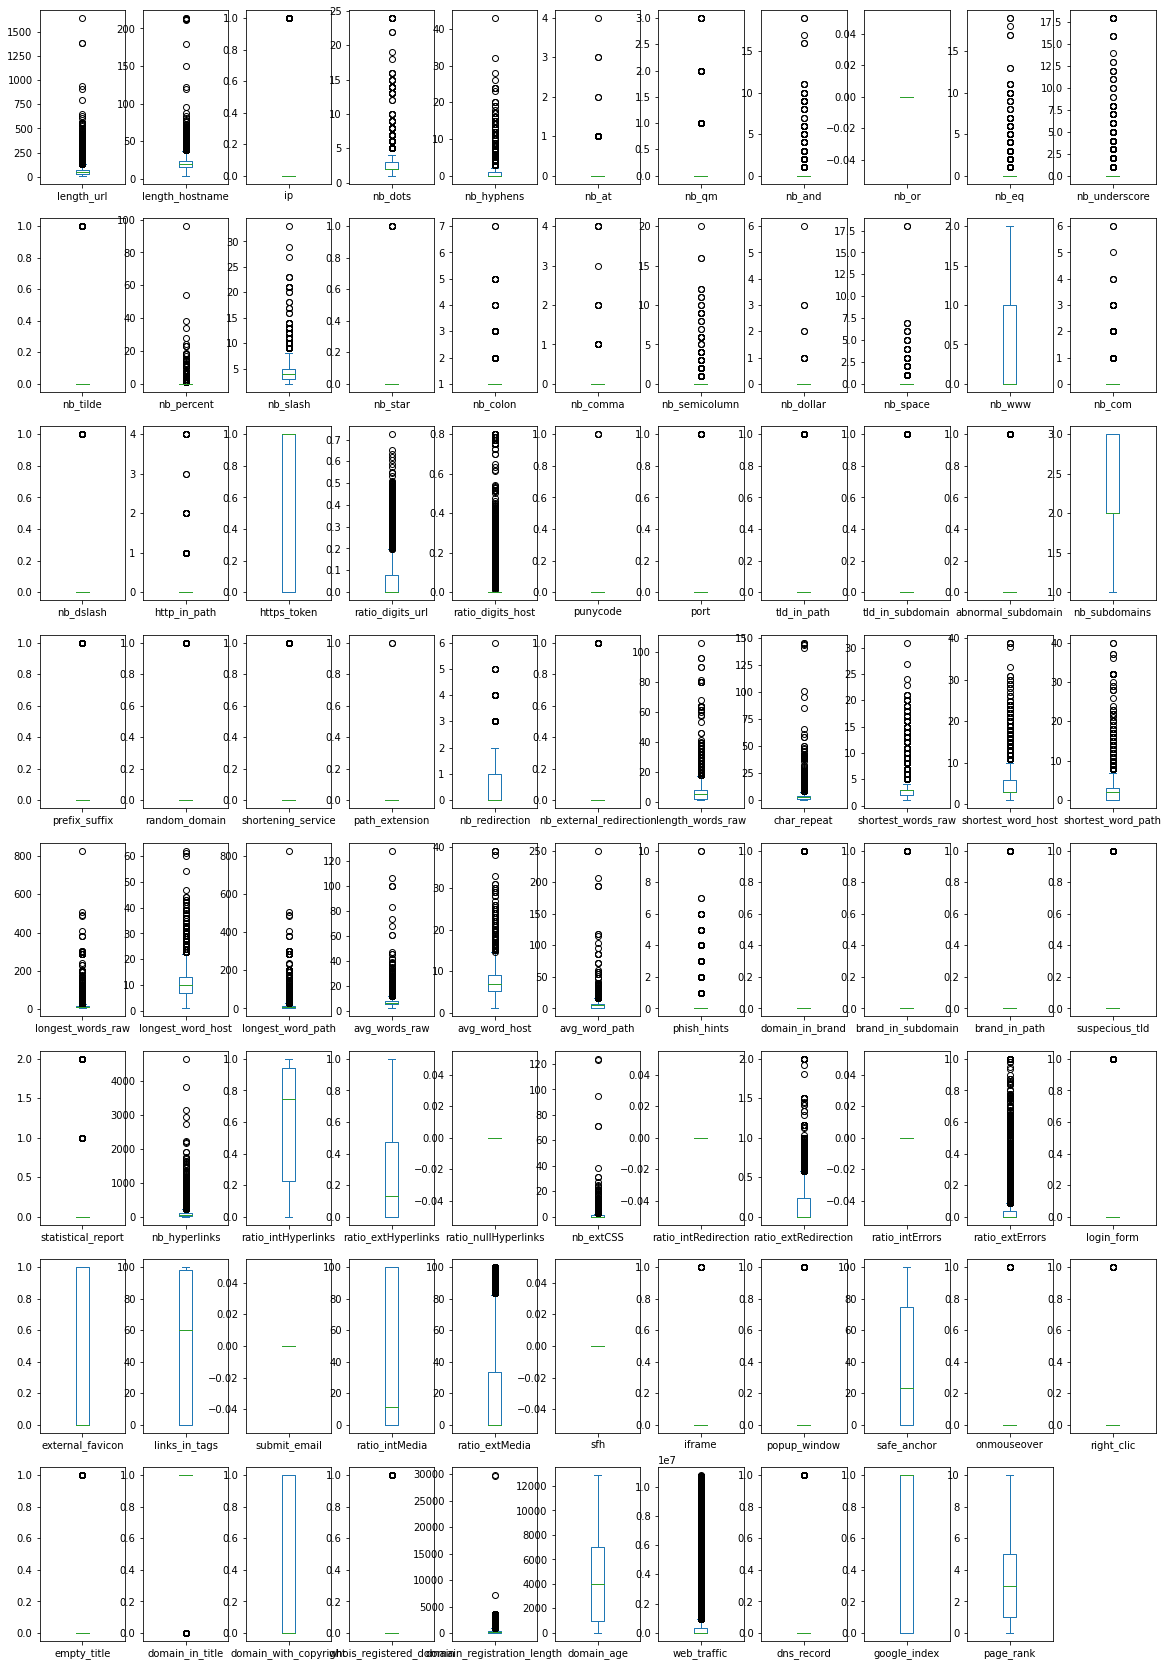

In [ ]:
from matplotlib import pyplot
df.plot(kind='box', subplots=True, layout=(8,11),
             sharex=False, sharey=False)
pyplot.show()

Histogram untuk memahami distribusi data. Dari histogram yang dihasilkan pada kode dibawah, dapat dilihat bahwa data memiliki rentang yang berbeda-beda. Data memiliki frekuensi yang tinggi pada nilai minimum dan maksimumnya.

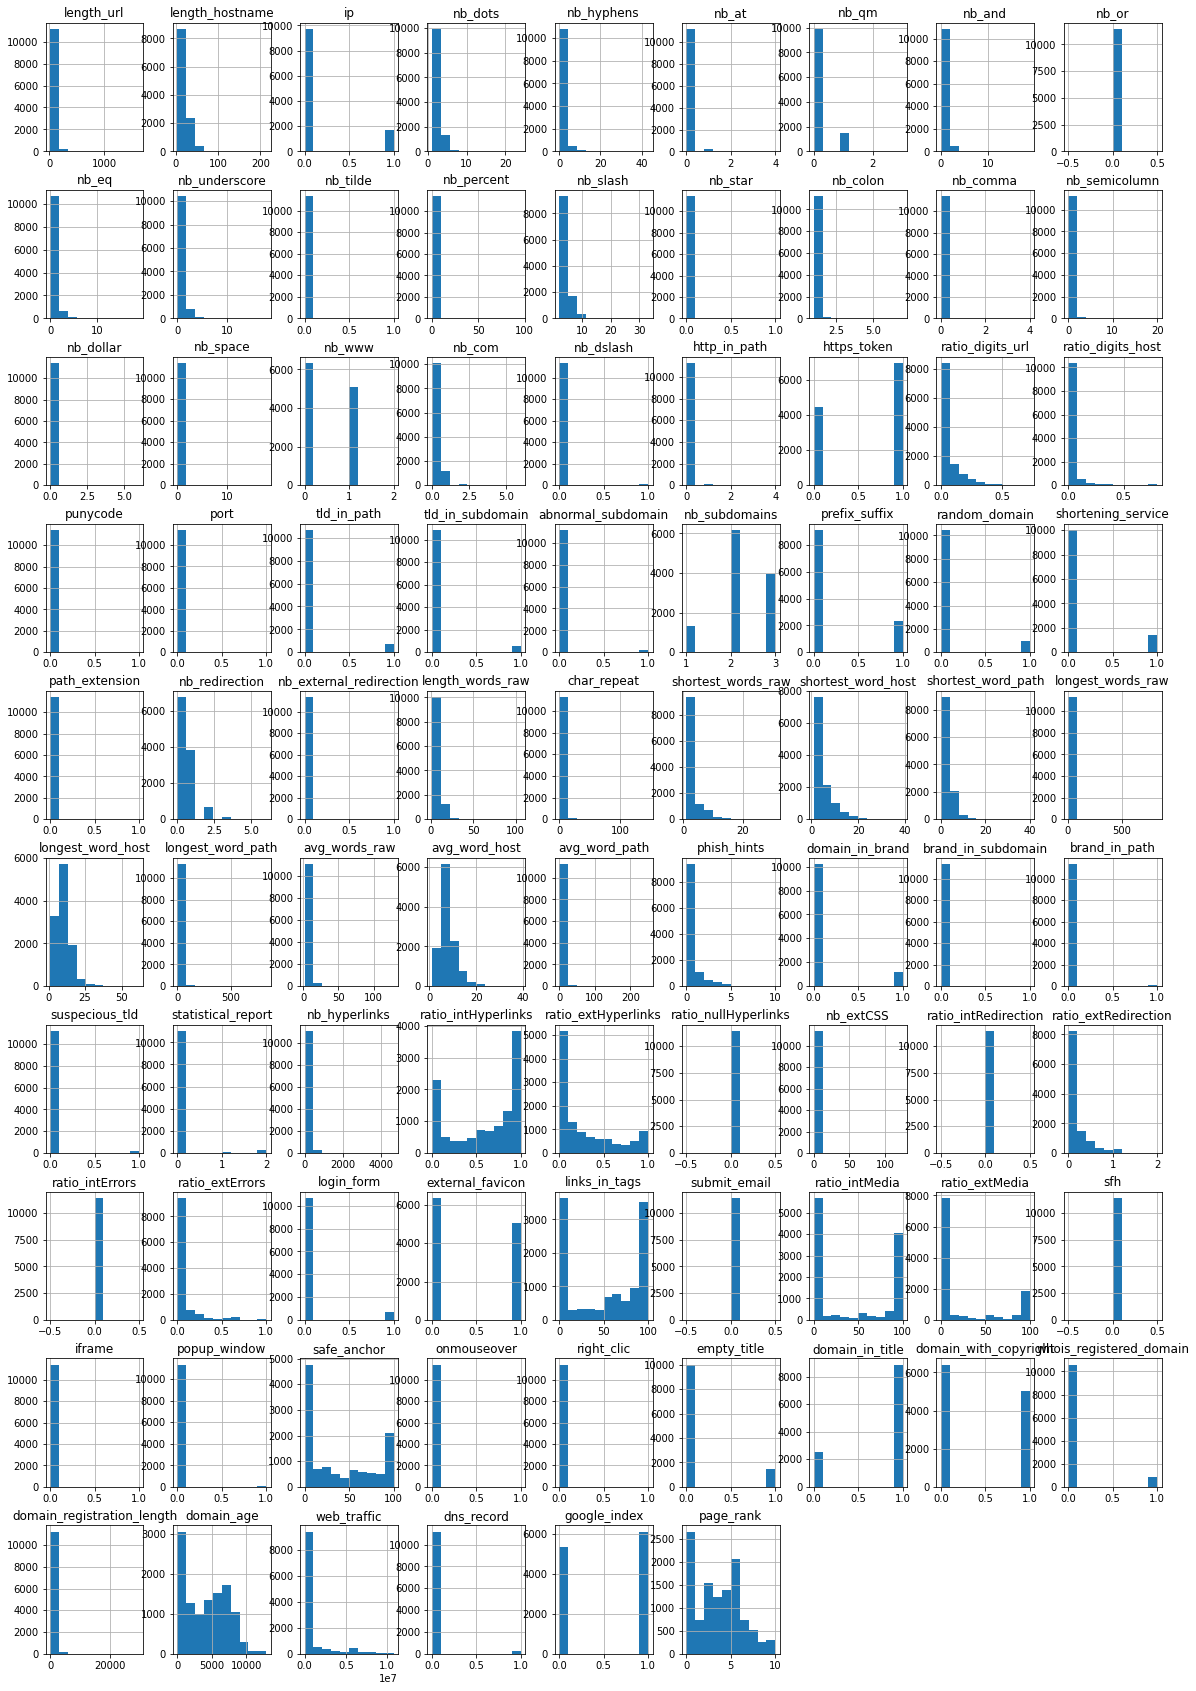

In [ ]:
df.hist()
pyplot.show()

Kode dibawah berfungsi untuk melihat sebaran kelas pada data. Dari grafik yang dihasilkan, dapat dilihat bahwa pada dataset, jumlah data yang berlabel 'legitimate' dan 'phishing' seimbang. Maka dari itu, tidak perlu dilakukan oversampling ataupun undersampling karena data sudah balance.

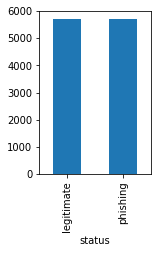

In [ ]:
plt.rcParams['figure.figsize'] = (2, 3)
df.groupby('status').size().plot(kind='bar')
pyplot.show()

Kode di bawah untuk menunjukkan deskripsi statistik umum pada data, dapat dilihat bahwa data memiliki rentang yang berbeda-beda.

In [ ]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


Dari EDA yang telah dilakukan, ditentukan perlakuan yang dilakukan pada data adalah normalisasi agar data memiliki rentang yang sama. Lalu dilakukan penghapusan pada fitur yang bukan numerik.

Dengan mempertimbangkan karakteristik data yang memiliki cukup banyak noise, dipilih algoritma klasifikasi yang dapat bekerja meskipun noise data tinggi. Algoritma yang dipilih adalah Decision Tree, KNN, dan Naive Bayes.

#Preprocessing data

##Menggunakan Pearson Correlation untuk seleksi fitur

Karena fitur yang dinilai terlalu banyak, dilakukan seleksi fitur dengan melakukan perhitungan pearson correlation antar fitur. Fitur dengan korelasi yang tinggi dibuang salah satunya.

In [ ]:
cor = X_train.corr()
print(cor)

                            length_url  length_hostname        ip   nb_dots  \
length_url                    1.000000         0.211758  0.441171  0.449704   
length_hostname               0.211758         1.000000  0.258846  0.398633   
ip                            0.441171         0.258846  1.000000  0.302549   
nb_dots                       0.449704         0.398633  0.302549  1.000000   
nb_hyphens                    0.397580         0.056635  0.108362  0.048001   
nb_at                         0.132712         0.064929  0.056108  0.257409   
nb_qm                         0.520854         0.166161  0.406396  0.381219   
nb_and                        0.571647         0.143433  0.369201  0.464879   
nb_or                              NaN              NaN       NaN       NaN   
nb_eq                         0.622223         0.184730  0.434271  0.449652   
nb_underscore                 0.432035         0.087009  0.203236  0.348677   
nb_tilde                      0.023420        -0.005

Fungsi dibawah berguna untuk menemukan fitur yang berkorelasi

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

Daftar fitur dengan korelasi yang > 0.5

In [ ]:
corr_features = correlation(X_train, 0.5)
print(corr_features)

{'avg_words_raw', 'avg_word_path', 'abnormal_subdomain', 'ratio_intMedia', 'nb_semicolumn', 'http_in_path', 'longest_word_path', 'safe_anchor', 'longest_word_host', 'length_words_raw', 'ratio_extMedia', 'avg_word_host', 'char_repeat', 'phish_hints', 'ratio_extHyperlinks', 'links_in_tags', 'nb_subdomains', 'dns_record', 'nb_eq', 'ratio_digits_url', 'page_rank', 'nb_qm', 'longest_words_raw', 'nb_and', 'external_favicon'}


penghapusan fitur yang berkorelasi dan fitur 'url' pada df

In [ ]:
df.drop(['url'],inplace=True,axis=1)
df_baru = df.drop(corr_features,axis=1)

In [ ]:
print(df.shape)
print(df_baru.shape)

(11430, 88)
(11430, 63)


##Normalisasi dan Penanganan Missing value

Dilakukan pengecekan apakah ada missing value. Karena missing value tidak ditemukan (data lengkap), jadi tidak dilakukan penanganan apapun.

In [ ]:
#Mengecek nilai kosong
print(df.isna().sum())

length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_subdomain              0
abnormal

In [ ]:
print(df.dtypes)

length_url                      int64
length_hostname                 int64
ip                              int64
nb_dots                         int64
nb_hyphens                      int64
nb_at                           int64
nb_qm                           int64
nb_and                          int64
nb_or                           int64
nb_eq                           int64
nb_underscore                   int64
nb_tilde                        int64
nb_percent                      int64
nb_slash                        int64
nb_star                         int64
nb_colon                        int64
nb_comma                        int64
nb_semicolumn                   int64
nb_dollar                       int64
nb_space                        int64
nb_www                          int64
nb_com                          int64
nb_dslash                       int64
http_in_path                    int64
https_token                     int64
ratio_digits_url              float64
ratio_digits

Normalisasi dilakukan untuk menyamakan rentang dari setiap fitur. Hal ini dilakukan agar kedudukan / pengaruh tiap fitur dalam model setara. Normalisasi yang dilakukan adalah MinMax.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Melakukan normalisasi data
scaler = MinMaxScaler()
data = scaler.fit_transform(df.iloc[:, :-1])
data_baru = scaler.fit_transform(df_baru.iloc[:, :-1])

In [ ]:
df_norm = pd.DataFrame(data, columns =['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank'])

df_norm_baru = pd.DataFrame(data_baru, columns =['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_or', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash',
       'nb_star', 'nb_colon', 'nb_comma', 'nb_dollar', 'nb_space', 'nb_www',
       'nb_com', 'nb_dslash', 'https_token', 'ratio_digits_host', 'punycode',
       'port', 'tld_in_path', 'tld_in_subdomain', 'prefix_suffix',
       'random_domain', 'shortening_service', 'path_extension',
       'nb_redirection', 'nb_external_redirection', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intRedirection',
       'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
       'login_form', 'submit_email', 'sfh', 'iframe', 'popup_window',
       'onmouseover', 'right_clic', 'empty_title', 'domain_in_title',
       'domain_with_copyright', 'whois_registered_domain',
       'domain_registration_length', 'domain_age', 'web_traffic',
       'google_index'])

In [ ]:
df_norm.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,0.015347,0.071429,0.0,0.086957,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.001542,0.000854,0.000000,1.0,1.0,0.4
1,0.039902,0.090476,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.002615,0.448471,0.000000,0.0,1.0,0.2
2,0.069982,0.219048,1.0,0.130435,0.023256,0.0,0.333333,0.105263,0.0,0.157895,...,0.0,1.0,0.0,0.0,0.000503,0.311656,0.541310,0.0,1.0,0.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.002112,0.000854,0.010004,0.0,0.0,0.3
4,0.026397,0.052381,0.0,0.043478,0.046512,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.007543,0.635341,0.000810,0.0,0.0,0.6


In [ ]:
print(df.columns)
print(df_baru.columns)

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

#Modelling dan Evaluasi

Dilakukan proses training dengan menggunakan K-Fold cross validation untuk mendapatkan algoritma machine learning yang memiliki kinerja terbaik. Tiap algoritma dilakukan pelatihan untuk beberapa hyperparameter yang mungkin. Proses modelling ini dilakukan pada 2 jenis data, yaitu data setelah penghapusan fitur dan sebelum penghapusan fitur.

In [ ]:
# Kode dibawah ini merupakan reuse dengan modifikasi dari projek penulis yang telah dilakukan sebelumnya yang berjudul "Pengaruh kondisi jalan terhadap keparahan kecelakaan"
# Kode program terkait dapat diakses pada tautan: https://colab.research.google.com/drive/1HvT7V7FH35FqkAeMwhvHO5fCqxIj9LIR?usp=sharing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#digunakan untuk membuat model
models = []
models.append(('KNN 3', KNeighborsClassifier(n_neighbors=3))) #model KNN dengan k=3
models.append(('KNN 5', KNeighborsClassifier(n_neighbors=5))) #model KNN dengan k=5
models.append(('KNN 7', KNeighborsClassifier(n_neighbors=7))) #model KNN dengan k=7
models.append(('KNN 9', KNeighborsClassifier(n_neighbors=9))) #model KNN dengan k=7
models.append(('NB', GaussianNB())) #model Naive Bayes
models.append(('DT Gini-none', DecisionTreeClassifier(criterion='gini'))) #model Decision Tree dengan criterion gini tanpa max_features
models.append(('DT Entropi-none', DecisionTreeClassifier(criterion='entropy'))) #model Decision Tree dengan criterion entropy tanpa max_features
models.append(('DT Gini-auto', DecisionTreeClassifier(criterion='gini', max_features='auto'))) #model Decision Tree dengan criterion gini dan max_features auto
models.append(('DT Entropi-auto', DecisionTreeClassifier(criterion='entropy', max_features='auto'))) #model Decision Tree dengan criterion entropy dan max_features auto
models.append(('DT Gini-log2', DecisionTreeClassifier(criterion='gini', max_features='log2'))) #model Decision Tree dengan criterion gini dan max_features log2
models.append(('DT Entropi-log2', DecisionTreeClassifier(criterion='entropy', max_features='log2'))) #model Decision Tree dengan criterion entropy dan max_features log2

##Untuk data tanpa penghapusan fitur

In [ ]:
#sebagai variabel nama dan hasil
results = [] #hasil
names = [] #nama

In [ ]:
y = df['status']

X = df_norm

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3)

print(X_train.shape)

(8001, 87)


In [ ]:
#dilakukan training data menggunakan k-fold
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import StratifiedKFold


for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #karena dataset terdiri lebih dari seribu baris maka n_splits yang digunakan adalah 10
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s\t: %f (%f) \t %f' % (name, cv_results.mean(), cv_results.std(), (cv_results.mean()/cv_results.std())))

KNN 3	: 0.922510 (0.009549) 	 96.612567
KNN 5	: 0.922886 (0.009446) 	 97.702529
KNN 7	: 0.921385 (0.008808) 	 104.602748
KNN 9	: 0.921635 (0.008384) 	 109.923844
NB	: 0.702911 (0.014001) 	 50.203995
DT Gini-none	: 0.932133 (0.008681) 	 107.379205
DT Entropi-none	: 0.933634 (0.010219) 	 91.361829
DT Gini-auto	: 0.908636 (0.010116) 	 89.822285
DT Entropi-auto	: 0.920385 (0.008931) 	 103.051524
DT Gini-log2	: 0.906260 (0.013505) 	 67.103237
DT Entropi-log2	: 0.911762 (0.012142) 	 75.089821


In [ ]:
from sklearn.metrics import classification_report

model_DTe = DecisionTreeClassifier(criterion='entropy')
model_DTe.fit(X_train, y_train)
predict_DTe = model_DTe.predict(X_test)

print(classification_report(y_test, predict_DTe)) #digunakan untuk mencetak hasil prediksi

              precision    recall  f1-score   support

  legitimate       0.94      0.93      0.93      1707
    phishing       0.93      0.94      0.94      1722

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429



##Untuk data dengan penghapusan fitur

In [ ]:
#sebagai variabel nama dan hasil
results = [] #hasil
names = [] #nama

In [ ]:
y = df['status']

X = df_norm_baru

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.3)

print(X_train.shape)

(8001, 62)


In [ ]:
#dilakukan training data menggunakan k-fold
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import StratifiedKFold


for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #karena dataset terdiri lebih dari seribu baris maka n_splits yang digunakan adalah 10
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s\t: %f (%f) \t %f' % (name, cv_results.mean(), cv_results.std(), (cv_results.mean()/cv_results.std())))

KNN 3	: 0.904762 (0.011538) 	 78.415283
KNN 5	: 0.908637 (0.006830) 	 133.036316
KNN 7	: 0.906011 (0.005674) 	 159.691244
KNN 9	: 0.907885 (0.007280) 	 124.702668
NB	: 0.630669 (0.013413) 	 47.018630
DT Gini-none	: 0.924884 (0.009213) 	 100.390788
DT Entropi-none	: 0.924758 (0.009865) 	 93.745929
DT Gini-auto	: 0.906515 (0.012189) 	 74.373031
DT Entropi-auto	: 0.903263 (0.017584) 	 51.369306
DT Gini-log2	: 0.900385 (0.015707) 	 57.323586
DT Entropi-log2	: 0.910508 (0.009929) 	 91.701579


Didapati hasil yang terbaik diperoleh oleh data tanpa pengurangan fitur dan algoritma Decision tree dengan criterion Entropy. Sehingga dibuat model dan dilakukan pengujian menggunakan data testing yang sudah dipisah di awal.

In [ ]:
from sklearn.metrics import classification_report

model_KNN7 = KNeighborsClassifier(n_neighbors=7)
model_KNN7.fit(X_train, y_train)
predict_KNN7 = model_KNN7.predict(X_test)

print(classification_report(y_test, predict_KNN7)) #digunakan untuk mencetak hasil prediksi

              precision    recall  f1-score   support

  legitimate       0.90      0.91      0.91      1707
    phishing       0.91      0.90      0.91      1722

    accuracy                           0.91      3429
   macro avg       0.91      0.91      0.91      3429
weighted avg       0.91      0.91      0.91      3429



Kode di bawah untuk memvisualisasikan bentuk tree dari model.

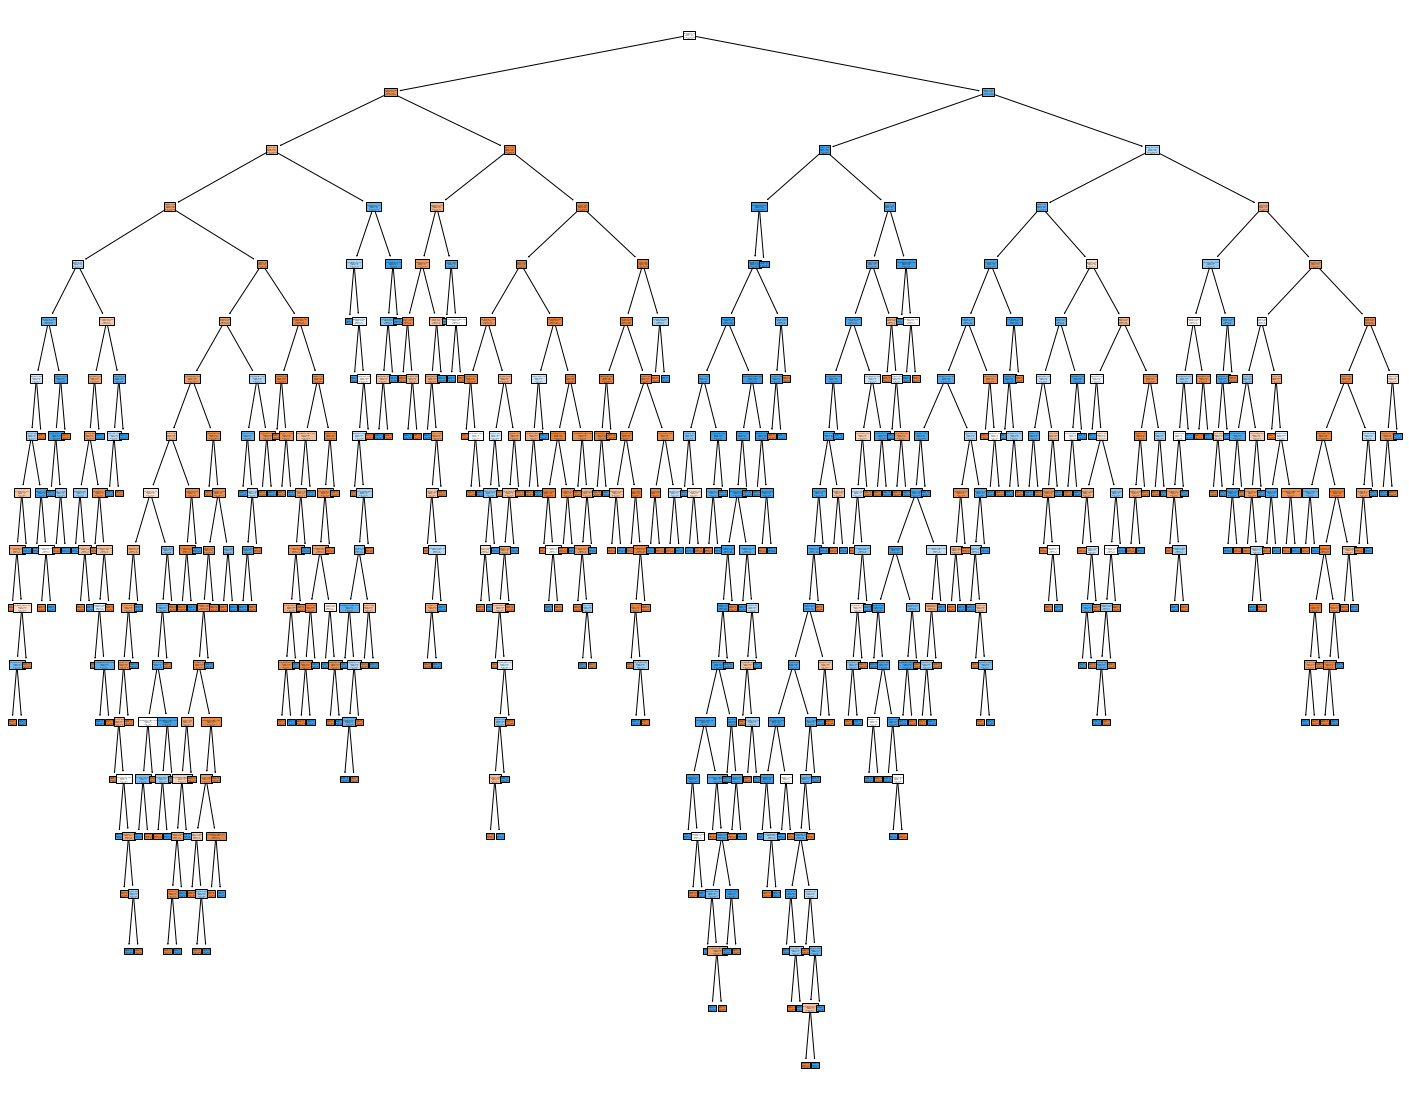

In [ ]:
from sklearn import tree
import matplotlib

#digunakan untuk mencetak tree dalam bentuk gambar
fig = matplotlib.pyplot.figure(figsize=(25,20))
_ = tree.plot_tree(model_DTe, feature_names=
                   ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
                    'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
                    'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
                    'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
                    'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
                    'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
                    'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
                    'prefix_suffix', 'random_domain', 'shortening_service',
                    'path_extension', 'nb_redirection', 'nb_external_redirection',
                    'length_words_raw', 'char_repeat', 'shortest_words_raw',
                    'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
                    'longest_word_host', 'longest_word_path', 'avg_words_raw',
                    'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
                    'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
                    'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
                    'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
                    'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
                    'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
                    'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
                    'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
                    'empty_title', 'domain_in_title', 'domain_with_copyright',
                    'whois_registered_domain', 'domain_registration_length', 'domain_age',
                    'web_traffic', 'dns_record', 'google_index', 'page_rank'], class_names=['1','2','3'], filled=True)

Data yang sudah diprepocessing disimpan kembali dalam bentuk csv.

In [ ]:
df_norm['status'] = df['status']
df_norm.to_csv('dataset_phishing_norm.csv', encoding='utf-8')

#Deployment

Dashboard dapat dilihat pada tautan: https://datastudio.google.com/reporting/d653e481-cca9-4225-bc60-d59c9eddc771

#Feedback

Berdasarkan pengujian model pada algoritma K-Nearest Neighbor, Naive Bayes, dan Decision Tree terhadap dataset Web Phising didapatkan hasil klasifikasi terbaik dengan nilai F1-score sebesar 0.92. Hasil tersebut didapatkan dengan menggunakan seluruh fitur yang ada pada dataset tanpa melakukan seleksi fitur dan menggunakan algoritma Decision Tree Entropy. Dengan demikian dapat disimpulkan bahwa algoritma Decision Tree Entropy merupakan algoritma terbaik untuk melakukan klasifikasi Web Phising.

Penelitian yang akan dilakukan selanjutnya diharapkan dapat melakukan penangan terhadap data yang memiliki outlier sehingga mungkin dapat memberikan hasil yang lebih baik. Penanganan outlier dapat dilakukan dengan pendekatan interquartile dan mean value.